In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
sns.set()

%matplotlib inline
plt.style.use('ggplot')

In [3]:
main_data=pd.read_csv('C:\\Users\\Taha\\Documents\\SUMMER\\datathon2020\\weather_and_traffic.csv')
df=main_data.copy()
df

,dt_iso,dt,temp,temp_feels_like,main_pressure,humidity,wind_speed,wind_deg,clouds,rain_1h,rain_3h,weather_main,weather_description,date,traffic
0,2018-03-01 00:00:00,1519862400,21.67,20.27,1010,60,3.60,70,0,0.0,0.0,Clear,sky is clear,0,9191
1,2018-03-01 01:00:00,1519866000,20.91,19.27,1010,60,3.60,70,0,0.0,0.0,Clear,sky is clear,1,2798
2,2018-03-01 02:00:00,1519869600,19.86,20.75,1010,88,2.60,60,0,0.0,0.0,Clear,sky is clear,2,647
3,2018-03-01 03:00:00,1519873200,20.60,18.99,1011,57,3.09,80,1,0.0,0.0,Clear,sky is clear,3,462
4,2018-03-01 04:00:00,1519876800,20.26,22.09,1012,88,1.50,60,1,0.0,0.0,Clear,sky is clear,4,898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,2020-03-16 19:00:00,1584385200,22.85,22.19,1015,64,3.60,50,0,0.0,0.0,Clear,sky is clear,19,109324
3282,2020-03-16 20:00:00,1584388800,22.35,21.17,1015,68,4.60,60,0,0.0,0.0,Clear,sky is clear,20,74526
3283,2020-03-16 21:00:00,1584392400,21.52,21.43,1015,72,3.10,60,0,0.0,0.0,Clear,sky is clear,21,54814
3284,2020-03-16 22:00:00,1584396000,21.04,21.19,1014,77,3.10,70,0,0.0,0.0,Clear,sky is clear,22,44308


 traffic /hour on clear day

 traffic/hour on other weather conditions

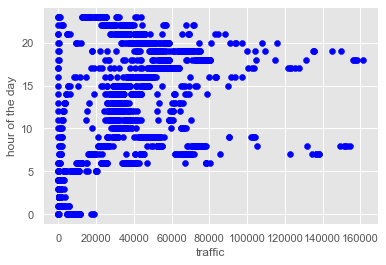

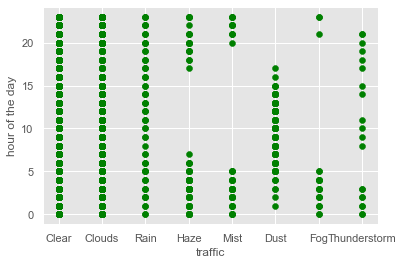

In [4]:
plt.scatter(main_data['traffic'],main_data['date'],color='blue')
plt.xlabel('traffic')
plt.ylabel('hour of the day')
plt.show()
plt.scatter(main_data['weather_main'],main_data['date'],color='green')
plt.xlabel('traffic')
plt.ylabel('hour of the day')
plt.show()


# STATS MODELS

In [5]:
df.rename(columns={'date':'hour'},inplace=True)
df.drop(['dt_iso','dt'],axis=1,inplace=True)
df

,temp,temp_feels_like,main_pressure,humidity,wind_speed,wind_deg,clouds,rain_1h,rain_3h,weather_main,weather_description,hour,traffic
0,21.67,20.27,1010,60,3.60,70,0,0.0,0.0,Clear,sky is clear,0,9191
1,20.91,19.27,1010,60,3.60,70,0,0.0,0.0,Clear,sky is clear,1,2798
2,19.86,20.75,1010,88,2.60,60,0,0.0,0.0,Clear,sky is clear,2,647
3,20.60,18.99,1011,57,3.09,80,1,0.0,0.0,Clear,sky is clear,3,462
4,20.26,22.09,1012,88,1.50,60,1,0.0,0.0,Clear,sky is clear,4,898
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,22.85,22.19,1015,64,3.60,50,0,0.0,0.0,Clear,sky is clear,19,109324
3282,22.35,21.17,1015,68,4.60,60,0,0.0,0.0,Clear,sky is clear,20,74526
3283,21.52,21.43,1015,72,3.10,60,0,0.0,0.0,Clear,sky is clear,21,54814
3284,21.04,21.19,1014,77,3.10,70,0,0.0,0.0,Clear,sky is clear,22,44308


In [6]:
import statsmodels.api as sm
print(df.dtypes)
df.describe()

temp                   float64
temp_feels_like        float64
main_pressure            int64
humidity                 int64
wind_speed             float64
wind_deg                 int64
clouds                   int64
rain_1h                float64
rain_3h                float64
weather_main            object
weather_description     object
hour                     int64
traffic                  int64
dtype: object


,temp,temp_feels_like,main_pressure,humidity,wind_speed,wind_deg,clouds,rain_1h,rain_3h,hour,traffic
count,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000
mean,21.900870,19.968192,1014.793974,58.982654,4.021911,189.482349,14.024650,0.000286,0.007234,11.537127,32974.045648
std,4.444895,4.358256,4.589231,20.846880,2.295214,103.562292,26.142142,0.009896,0.085244,6.919915,25381.714018
min,11.610000,6.340000,972.000000,10.000000,0.440000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,18.792500,16.920000,1013.000000,43.000000,2.100000,110.000000,0.000000,0.000000,0.000000,6.000000,9829.750000
50%,21.515000,20.005000,1015.000000,60.000000,3.600000,180.000000,1.000000,0.000000,0.000000,12.000000,31877.000000
75%,24.727500,22.970000,1017.000000,76.000000,5.100000,290.000000,20.000000,0.000000,0.000000,18.000000,47562.500000
max,38.780000,36.240000,1026.000000,100.000000,14.900000,360.000000,100.000000,0.400000,1.750000,23.000000,161122.000000


In [7]:
print("weather_main : ",df['weather_main'].unique())
print("weather_description : ",df['weather_description'].unique())

weather_main :  ['Clear' 'Clouds' 'Rain' 'Haze' 'Mist' 'Dust' 'Fog' 'Thunderstorm']
weather_description :  ['sky is clear' 'scattered clouds' 'overcast clouds' 'few clouds'
 'light rain' 'broken clouds' 'haze' 'mist' 'dust' 'fog' 'moderate rain'
 'thunderstorm with rain' 'thunderstorm with heavy rain' 'thunderstorm'
 'thunderstorm with light rain' 'light intensity shower rain']


In [8]:
df['weather_main']=df['weather_main'].map({'Clear':0,
                                           'Clouds':1,
                                           'Rain':2, 
                                           'Haze':3,
                                           'Mist':4,
                                           'Dust':5,
                                           'Fog':6,
                                           'Thunderstorm':7
                                          })
df['weather_description']=df['weather_description'].map({'sky is clear':0,
                                                         'scattered clouds':1,
                                                         'overcast clouds':2,
                                                         'few clouds':3,
                                                         'light rain':4,
                                                         'broken clouds':5,
                                                         'haze':6,
                                                         'mist':7,
                                                         'dust':8,
                                                         'fog':9,
                                                         'moderate rain':10,
                                                         'thunderstorm with rain':11,
                                                         'thunderstorm with heavy rain':12,
                                                         'thunderstorm':13,
                                                         'thunderstorm with light rain':14,
                                                         'light intensity shower rain':15
                                                        })

In [9]:
df

,temp,temp_feels_like,main_pressure,humidity,wind_speed,wind_deg,clouds,rain_1h,rain_3h,weather_main,weather_description,hour,traffic
0,21.67,20.27,1010,60,3.60,70,0,0.0,0.0,0,0,0,9191
1,20.91,19.27,1010,60,3.60,70,0,0.0,0.0,0,0,1,2798
2,19.86,20.75,1010,88,2.60,60,0,0.0,0.0,0,0,2,647
3,20.60,18.99,1011,57,3.09,80,1,0.0,0.0,0,0,3,462
4,20.26,22.09,1012,88,1.50,60,1,0.0,0.0,0,0,4,898
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,22.85,22.19,1015,64,3.60,50,0,0.0,0.0,0,0,19,109324
3282,22.35,21.17,1015,68,4.60,60,0,0.0,0.0,0,0,20,74526
3283,21.52,21.43,1015,72,3.10,60,0,0.0,0.0,0,0,21,54814
3284,21.04,21.19,1014,77,3.10,70,0,0.0,0.0,0,0,22,44308


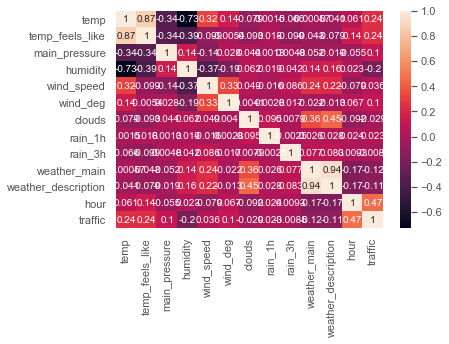

In [10]:
corrmatrix=df.corr()
sns.heatmap(corrmatrix, annot=True)
plt.show()

In [11]:
y=np.asarray(df['traffic'])
removal=['traffic','temp_feels_like','main_pressure','humidity','wind_speed','wind_deg','clouds','rain_1h','rain_3h','weather_description']
only=['traffic']
x1=np.asarray(df[df.columns[~df.columns.isin(removal)]])
x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     399.4
Date:                Thu, 03 Sep 2020   Prob (F-statistic):          3.59e-221
Time:                        11:28:18   Log-Likelihood:                -37477.
No. Observations:                3286   AIC:                         7.496e+04
Df Residuals:                    3282   BIC:                         7.499e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.239e+04   1997.665     -6.201      0.000   -1.63e+04   -8471.680
x1          1230.6682     85.477     14.398      0.000    1063.075    1398.261
x2          -759.1951    276.096     -2.750      0.006   -1300.533    -217.857
x3          1644.3844     55.729     29.507      0.000    1535.118    1753.651
==============================================================================
Omnibus:                      964.445   Durbin-Watson:                   0.388
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3595.982
Skew:                           1.419   Prob(JB):                         0.00
Kurtosis:                       7.267   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# SKLEARN


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
dff=main_data.copy()
dff.columns

Index(['dt_iso', 'dt', 'temp', 'temp_feels_like', 'main_pressure', 'humidity',
       'wind_speed', 'wind_deg', 'clouds', 'rain_1h', 'rain_3h',
       'weather_main', 'weather_description', 'date', 'traffic'],
      dtype='object')

In [14]:
dff.rename(columns={'date':'hour'},inplace=True)
dff.drop(['dt_iso','dt'],axis=1,inplace=True)
dff.isnull().sum()

temp                   0
temp_feels_like        0
main_pressure          0
humidity               0
wind_speed             0
wind_deg               0
clouds                 0
rain_1h                0
rain_3h                0
weather_main           0
weather_description    0
hour                   0
traffic                0
dtype: int64

In [15]:
dff.dtypes

temp                   float64
temp_feels_like        float64
main_pressure            int64
humidity                 int64
wind_speed             float64
wind_deg                 int64
clouds                   int64
rain_1h                float64
rain_3h                float64
weather_main            object
weather_description     object
hour                     int64
traffic                  int64
dtype: object

In [16]:

dff.describe(include = 'all')


,temp,temp_feels_like,main_pressure,humidity,wind_speed,wind_deg,clouds,rain_1h,rain_3h,weather_main,weather_description,hour,traffic
count,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286.000000,3286,3286,3286.000000,3286.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,16,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clear,sky is clear,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2083,2083,NaN,NaN
mean,21.900870,19.968192,1014.793974,58.982654,4.021911,189.482349,14.024650,0.000286,0.007234,NaN,NaN,11.537127,32974.045648
std,4.444895,4.358256,4.589231,20.846880,2.295214,103.562292,26.142142,0.009896,0.085244,NaN,NaN,6.919915,25381.714018
min,11.610000,6.340000,972.000000,10.000000,0.440000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,1.000000
25%,18.792500,16.920000,1013.000000,43.000000,2.100000,110.000000,0.000000,0.000000,0.000000,NaN,NaN,6.000000,9829.750000
50%,21.515000,20.005000,1015.000000,60.000000,3.600000,180.000000,1.000000,0.000000,0.000000,NaN,NaN,12.000000,31877.000000
75%,24.727500,22.970000,1017.000000,76.000000,5.100000,290.000000,20.000000,0.000000,0.000000,NaN,NaN,18.000000,47562.500000


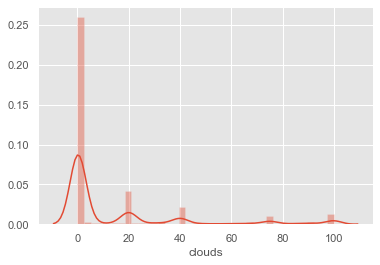

In [17]:
sns.distplot(dff['clouds'])

In [18]:
q=dff['clouds'].quantile(0.95)
data_1=dff[dff['clouds']<q]
data_1.describe(include='all')

,temp,temp_feels_like,main_pressure,humidity,wind_speed,wind_deg,clouds,rain_1h,rain_3h,weather_main,weather_description,hour,traffic
count,3117.000000,3117.000000,3117.000000,3117.000000,3117.000000,3117.000000,3117.000000,3117.0,3117.000000,3117,3117,3117.000000,3117.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,15,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clear,sky is clear,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2083,2083,NaN,NaN
mean,21.893009,19.933244,1014.814565,58.899583,4.049705,191.035290,9.566891,0.0,0.006898,NaN,NaN,11.606673,33169.323388
std,4.460323,4.378065,4.581974,20.716712,2.286914,103.255591,18.229577,0.0,0.084062,NaN,NaN,6.911038,25233.626452
min,11.610000,6.340000,972.000000,10.000000,0.440000,0.000000,0.000000,0.0,0.000000,NaN,NaN,0.000000,1.000000
25%,18.770000,16.870000,1013.000000,43.000000,2.570000,110.000000,0.000000,0.0,0.000000,NaN,NaN,6.000000,10061.000000
50%,21.510000,19.930000,1015.000000,60.000000,3.600000,190.000000,0.000000,0.0,0.000000,NaN,NaN,12.000000,31887.000000
75%,24.730000,22.960000,1017.000000,76.000000,5.100000,290.000000,20.000000,0.0,0.000000,NaN,NaN,18.000000,47820.000000


In [45]:
remove=['clouds','rain_1h','rain_3h','hour','temp','wind_deg','weather_main']
d2=dff.drop(remove,axis=1)
d2.describe(include='all')

,temp_feels_like,main_pressure,humidity,wind_speed,weather_description,traffic
count,3286.000000,3286.000000,3286.000000,3286.000000,3286,3286.000000
unique,NaN,NaN,NaN,NaN,16,NaN
top,NaN,NaN,NaN,NaN,sky is clear,NaN
freq,NaN,NaN,NaN,NaN,2083,NaN
mean,19.968192,1014.793974,58.982654,4.021911,NaN,32974.045648
std,4.358256,4.589231,20.846880,2.295214,NaN,25381.714018
min,6.340000,972.000000,10.000000,0.440000,NaN,1.000000
25%,16.920000,1013.000000,43.000000,2.100000,NaN,9829.750000
50%,20.005000,1015.000000,60.000000,3.600000,NaN,31877.000000
75%,22.970000,1017.000000,76.000000,5.100000,NaN,47562.500000


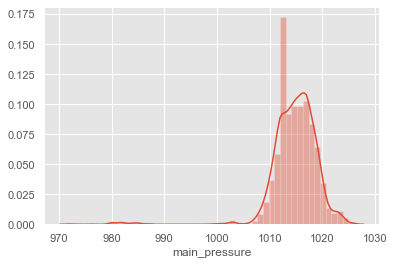

In [46]:
sns.distplot(d2['main_pressure'])

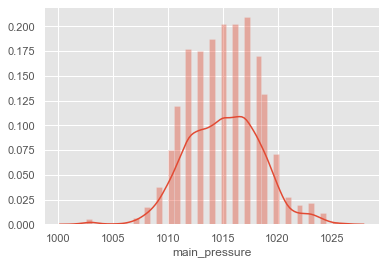

In [47]:
q=d2['main_pressure'].quantile(0.01)
d2=d2[d2['main_pressure']>q]
sns.distplot(d2['main_pressure'])

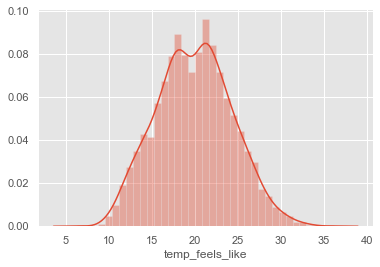

In [48]:
sns.distplot(d2['temp_feels_like'])

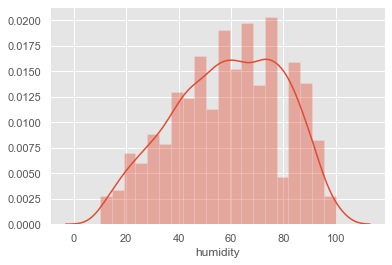

In [49]:
sns.distplot(d2['humidity'])

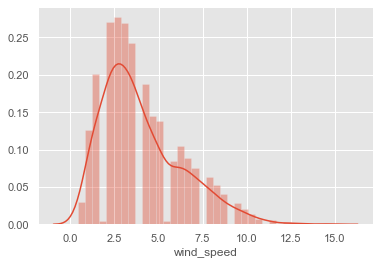

In [50]:
sns.distplot(d2['wind_speed'])

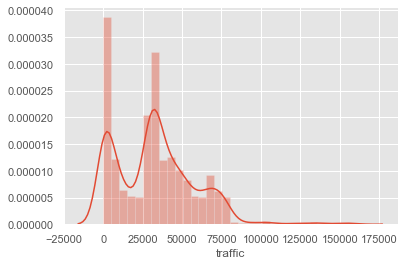

In [51]:
sns.distplot(d2['traffic'])

In [52]:
d2.describe(include='all')

,temp_feels_like,main_pressure,humidity,wind_speed,weather_description,traffic
count,3253.000000,3253.000000,3253.000000,3253.000000,3253,3253.000000
unique,NaN,NaN,NaN,NaN,16,NaN
top,NaN,NaN,NaN,NaN,sky is clear,NaN
freq,NaN,NaN,NaN,NaN,2060,NaN
mean,19.959044,1015.103597,59.023978,4.021946,NaN,32994.808177
std,4.373892,3.359190,20.882779,2.284409,NaN,25414.067341
min,6.340000,1002.000000,10.000000,0.440000,NaN,1.000000
25%,16.870000,1013.000000,43.000000,2.100000,NaN,9866.000000
50%,20.000000,1015.000000,60.000000,3.600000,NaN,31848.000000
75%,22.970000,1017.000000,77.000000,5.100000,NaN,47558.000000


In [53]:
log_traffic=np.log(d2['traffic'])
log_temp_feels_like=np.log(d2['temp_feels_like'])
log_wind_speed=(d2['wind_speed'])
log_main_pressure=np.log(d2['main_pressure'])
log_humidity=np.log(d2['humidity'])
ldf=d2.copy()


In [54]:
ldf['traffic']=log_traffic
ldf['temp_feels_like']=log_temp_feels_like
ldf['wind_speed']=log_wind_speed
ldf['main_pressure']=log_main_pressure
ldf['humidity']=log_humidity

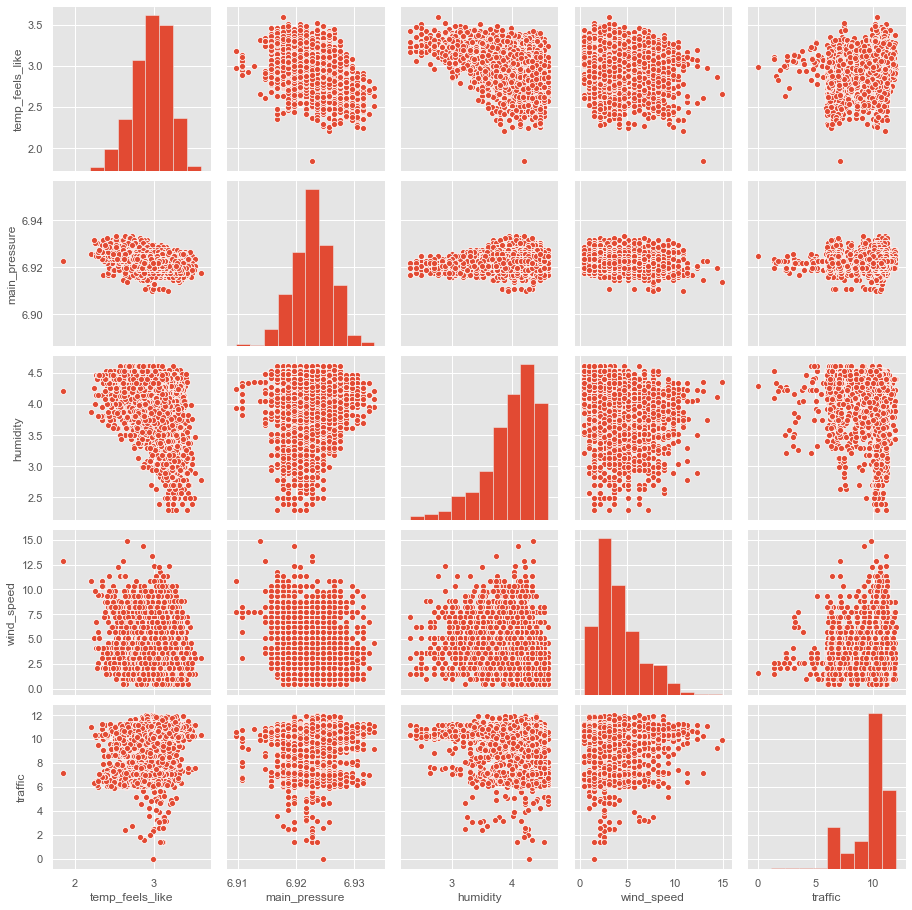

In [28]:
sns.pairplot(ldf)

In [55]:
plt.scatter(ldf['traffic'],ldf['weather_main'])

KeyError: 'weather_main'

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=d2[['temp_feels_like','humidity','main_pressure','wind_speed']]#ldf giving 131 !
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,1)for i in range (variables.shape[1])]
vif["features"]=variables.columns
vif

,VIF,features
0,13.122655,temp_feels_like
1,13.122655,humidity
2,13.122655,main_pressure
3,13.122655,wind_speed


In [57]:
pd.set_option('display.max_columns', None)
dwd=pd.get_dummies(ldf,drop_first=True)
dwd.dtypes

temp_feels_like                                     float64
main_pressure                                       float64
humidity                                            float64
wind_speed                                          float64
traffic                                             float64
weather_description_dust                              uint8
weather_description_few clouds                        uint8
weather_description_fog                               uint8
weather_description_haze                              uint8
weather_description_light intensity shower rain       uint8
weather_description_light rain                        uint8
weather_description_mist                              uint8
weather_description_moderate rain                     uint8
weather_description_overcast clouds                   uint8
weather_description_scattered clouds                  uint8
weather_description_sky is clear                      uint8
weather_description_thunderstorm        

In [58]:
dwd.describe(include='all')

,temp_feels_like,main_pressure,humidity,wind_speed,traffic,weather_description_dust,weather_description_few clouds,weather_description_fog,weather_description_haze,weather_description_light intensity shower rain,weather_description_light rain,weather_description_mist,weather_description_moderate rain,weather_description_overcast clouds,weather_description_scattered clouds,weather_description_sky is clear,weather_description_thunderstorm,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain
count,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000
mean,2.968423,6.922740,3.997272,4.021946,9.713766,0.041500,0.106363,0.007685,0.029511,0.000307,0.019982,0.016600,0.000922,0.036889,0.061789,0.633262,0.001537,0.000307,0.001844,0.002459
std,0.228885,0.003309,0.435660,2.284409,1.661539,0.199475,0.308350,0.087341,0.169260,0.017533,0.139958,0.127787,0.030359,0.188518,0.240809,0.481988,0.039181,0.017533,0.042914,0.049538
min,1.846879,6.909753,2.302585,0.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.825537,6.920672,3.761200,2.100000,9.196850,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.995732,6.922644,4.094345,3.600000,10.368730,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3.134189,6.924612,4.343805,5.100000,10.769705,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,3.590163,6.933423,4.605170,14.900000,11.989917,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
targets=dwd['traffic']
inputs=dwd.drop(['traffic'],axis=1)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)
inputs_scaled=scaler.transform(inputs)
inputs_scaled

array([[ 0.17792864, -1.5216354 ,  0.22285158, ..., -0.01753577,
        -0.04298674, -0.0496521 ],
       [-0.0431445 , -1.5216354 ,  0.22285158, ..., -0.01753577,
        -0.04298674, -0.0496521 ],
       [ 0.28019797, -1.5216354 ,  1.10209474, ..., -0.01753577,
        -0.04298674, -0.0496521 ],
       ...,
       [ 0.42110089, -0.0291903 ,  0.64141091, ..., -0.01753577,
        -0.04298674, -0.0496521 ],
       [ 0.3718876 , -0.32709029,  0.79554398, ..., -0.01753577,
        -0.04298674, -0.0496521 ],
       [ 0.08203147, -0.32709029,  0.79554398, ..., -0.01753577,
        -0.04298674, -0.0496521 ]])

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs_scaled,targets,test_size=0.1,random_state=365)

In [62]:
reg=LinearRegression(normalize=True)
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

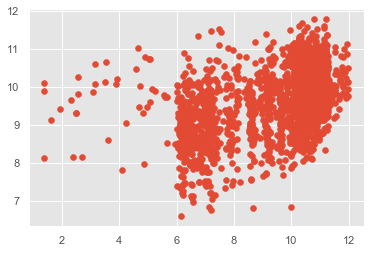

In [63]:
y_hat=reg.predict(x_train)
plt.scatter(y_train,y_hat)
plt.show()

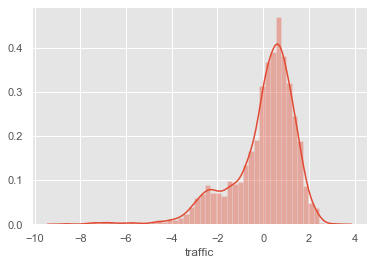

In [64]:
sns.distplot(y_train-y_hat)

In [65]:
def adjRsquared(x,y,reg):
    R=reg.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    return 1-(1-R)*(n-1)/(n-p-1)

In [75]:
print("Intercept : ",reg.intercept_)
print("R Squared : ",reg.score(x_train,y_train))
print("Adjusted R squared : ",adjRsquared(x_train,y_train,reg))
reg_summary=pd.DataFrame(inputs.columns.values,columns=     ['Features'])
reg_summary['Weights']=reg.coef_

from sklearn.feature_selection import f_regression
f_regression(x_train,y_train)

p_values=f_regression(x_train,y_train)[1]
reg_summary['p values']=p_values.round(3)

reg_summary

Intercept :  9.71856657578144
R Squared :  0.22243687820253688
Adjusted R squared :  0.21735476629536388


,Features,Weights,p values
0,temp_feels_like,0.724769,0.000
1,main_pressure,0.495274,0.002
2,humidity,-0.045480,0.000
3,wind_speed,0.334435,0.000
4,weather_description_dust,-0.127310,0.304
5,weather_description_few clouds,-0.011772,0.808
6,weather_description_fog,-0.160534,0.000
7,weather_description_haze,-0.237022,0.000
8,weather_description_light intensity shower rain,0.013906,0.942
9,weather_description_light rain,0.014275,0.616


remove outliers
transform them to be linear
scale the features
add dummy variables


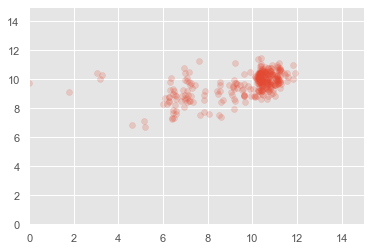

In [78]:
y_hat_test=reg.predict(x_test)
plt.scatter(y_test,y_hat_test,alpha=0.2)
plt.xlim(0,15)
plt.ylim(0,15)
plt.show()

In [97]:
df_pf=pd.DataFrame(np.exp(y_hat_test),columns=['Prediction'])
y_test=y_test.reset_index(drop=True)
df_pf['Actual Values']=np.exp(y_test)
df_pf['Difference']=(df_pf['Prediction']-df_pf['Actual Values'])
df_pf['Difference%']=np.absolute(df_pf['Difference']/df_pf['Actual Values']*100)
print(df_pf)

       Prediction  Actual Values     Difference  Difference%
0    22814.305454        29987.0   -7172.694546    23.919347
1     4644.271298          525.0    4119.271298   784.623104
2    19731.623486        34986.0  -15254.376514    43.601373
3    14922.086224        33895.0  -18972.913776    55.975553
4    18046.045788         5206.0   12840.045788   246.639374
..            ...            ...            ...          ...
321   1681.892282         5443.0   -3761.107718    69.099903
322  45145.257938        68495.0  -23349.742062    34.089703
323  22730.551416       136200.0 -113469.448584    83.310902
324  14504.668372        60661.0  -46156.331628    76.088973
325   3212.683623         1024.0    2188.683623   213.738635

[326 rows x 4 columns]


In [98]:
print(df_pf.describe())

         Prediction  Actual Values     Difference   Difference%
count    326.000000     326.000000     326.000000  3.260000e+02
mean   21517.790338   32977.052147  -11459.261809  7.161403e+03
std    14947.286990   25741.524480   23954.196174  9.700671e+04
min      829.191594       1.000000 -116523.459814  1.690478e+00
25%    10255.114301    9789.750000  -23667.582935  2.707025e+01
50%    18380.195345   31970.500000   -7563.281130  5.898560e+01
75%    29991.522925   46706.250000    3438.879826  8.233060e+01
max    95926.772886  151650.000000   76317.229833  1.732462e+06


# most of the predictions lie within 82  difference% which i feel is good enough  since this was a very non linear but still max difference % in 1730000 ! 